In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
df = pd.read_csv('random_timetable2.csv', sep=';', encoding='cp1251')
df.head()

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
0,101,пн,1,Мат Анализ,Иванов,Лекция,Васильевский остров,211
1,101,пн,2,Английский,Шептунов,Практика,Васильевский остров,213
2,101,пн,3,ОП,Рахимов,Лекция,Васильевский остров,203
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф,204
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207


# Занятость конкретной аудитории в определенный промежуток времени


In [4]:
number = int(input())
startDay = input()
startTime = int(input())
stopDay = input()
stopTime = int(input())

207
вт
1
чт
2


In [5]:
days = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
for i, day in enumerate(days):
    if day == startDay:
        break
time = startTime
result = np.array([])
timeList = np.array([])
            
# Таблица данных для одной аудитории
x = df[df['Аудитория'] == number]

while (day != stopDay) or (time != stopTime):
    for index, row in x.iterrows():
        if row['День'] == day and row['Номер пары'] == time:
            para = True
    if para == True:
        result = np.append(result, 'Занято')
    else: 
        result = np.append(result, 'Свободно')
    timeList = np.append(timeList, day + ' ' + str(time))
    if time != 4:
        time += 1
    else:
        time = 1
        i += 1
        day = days[i]
    para = False

In [6]:
# Все занятия, проходящие в данной аудитории
x.head(20)

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207
20,102,вт,1,Дискр Мат-ка,Исаев,Лекция,Васильевский остров,207
38,103,пн,3,Английский,Шептунов,Практика,Петергоф,207
54,104,пн,1,Дискр Мат-ка,Исаев,Практика,Петергоф,207
70,104,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
88,105,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
99,106,чт,1,История,Петров,Лекция,Петергоф,207
106,106,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
123,107,пт,2,Дискр Мат-ка,Исаев,Практика,Петергоф,207
138,108,чт,4,Английский,Васильева,Практика,Петергоф,207


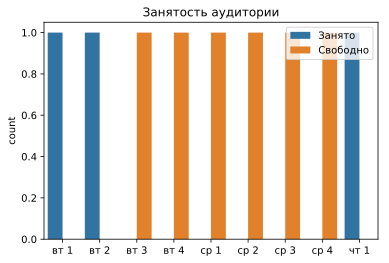

In [7]:
sns.countplot(x = timeList, hue = result);
plt.title('Занятость аудитории');

# Список свободных аудиторий в определенный промежуток времени на факультете

In [8]:
startDay = input()
startTime = int(input())
stopDay = input()
stopTime = int(input())

сб
1
сб
4


In [9]:
days = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
for i, day in enumerate(days):
    if day == startDay:
        break
time = startTime

classroomList = pd.unique(df['Аудитория'])
result = np.zeros(len(classroomList))


while (day != stopDay) or (time != stopTime):
    for index, row in df.iterrows():
        if row['День'] == day and row['Номер пары'] == time:
            for j, room in enumerate(classroomList):
                if row['Аудитория'] == room:
                    result[j] += 1
    if time != 4:
        time += 1
    else:
        time = 1
        i += 1
        day = days[i]

print('Свободные аудитории с ', startTime, ' пары ', startDay, ' до ', stopTime, '(не включительно) пары ', stopDay)
for i, room in enumerate(classroomList):
    if result[i] == 0:
        print(room)

Свободные аудитории с  1  пары  сб  до  4 (не включительно) пары  сб
211
213
204
208
214
210


# Расписание конкретной аудитории

In [10]:
number = int(input())

214


In [11]:
x = df[df['Аудитория'] == number]
x = x.sort_values(by=['День', 'Номер пары'], ascending=[True, True])
x = pd.concat([x[x['День'] == 'пн'], x[x['День'] == 'вт'], x[x['День'] == 'ср'], x[x['День'] == 'чт'], x[x['День'] == 'пт'], x[x['День'] == 'сб']], ignore_index=True)
x.head(20)


,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
0,102,пн,2,Алгебра,Заболотный,Лекция,Петергоф,214
1,105,вт,3,Английский,Мракова,Практика,Петергоф,214
2,103,вт,4,Английский,Шептунов,Практика,Петергоф,214
3,108,ср,2,Алгебра,Заболотный,Лекция,Петергоф,214
4,109,ср,3,История,Петров,Лекция,Петергоф,214
5,107,ср,4,ПЭВМ,Егоров,Практика,Петергоф,214
6,103,чт,1,История,Петров,Лекция,Петергоф,214
7,108,чт,1,ОП,Авдеев,Лекция,Петергоф,214
8,101,чт,2,ОП,Рахимов,Практика,Петергоф,214
9,106,чт,4,ПЭВМ,Сорокин,Практика,Петергоф,214


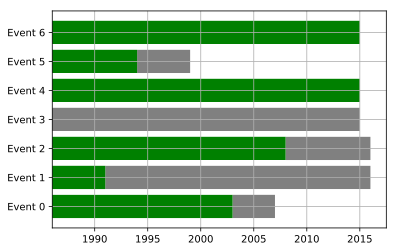

In [64]:
begin = np.array([2003,1991,2008,1986,2013,1994,2002])
end =   np.array([2007,2016,2016,2015,2013,1999,2002])

begin2 = np.array([1986,1986,1986,1986,1986,1986,1986])
end2 =   np.array([2003,1991,2008,1986,2015,1994,2015])

event = ["Event {}".format(i) for i in range(len(begin))]

plt.barh(range(len(begin)),  end-begin, left=begin, color='gray')
plt.barh(range(len(begin2)),  end2-begin2, left=begin2, color='green')


plt.yticks(range(len(begin)), event)
plt.grid(True)
plt.show()

In [14]:
number = int(input())
startDay = input()
startTime = int(input())
stopDay = input()
stopTime = int(input())

207
вт
1
чт
2


In [16]:
days = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
for i, day in enumerate(days):
    if day == startDay:
        break
time = startTime
result = np.array([])
timeList = np.array([])
            
# Таблица данных для одной аудитории
x = df[df['Аудитория'] == number]

while (day != stopDay) or (time != stopTime):
    for index, row in x.iterrows():
        if row['День'] == day and row['Номер пары'] == time:
            para = True
    if para == True:
        result = np.append(result, 'Занято')
    else: 
        result = np.append(result, 'Свободно')
    timeList = np.append(timeList, day + ' ' + str(time))
    if time != 4:
        time += 1
    else:
        time = 1
        i += 1
        day = days[i]
    para = False
    
print(timeList)
print(result)

['вт 1' 'вт 2' 'вт 3' 'вт 4' 'ср 1' 'ср 2' 'ср 3' 'ср 4' 'чт 1']
['Занято' 'Занято' 'Свободно' 'Свободно' 'Свободно' 'Свободно' 'Свободно'
 'Свободно' 'Занято']


In [41]:
begin = np.array(['вт 3'])
end =   np.array(['ср 4'])



event = ['Аудитория ' + str(number)]

plt.barh(0,  end-begin, height=0.8, left=begin)
plt.yticks(range(len(begin)), event)
plt.grid(True)
plt.show()

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U4') dtype('<U4') dtype('<U4')

In [40]:
matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

SyntaxError: invalid syntax (<ipython-input-40-3948ce9b70de>, line 1)

In [53]:
lessonCount = np.array([])
df['Порядковый'] = np.zeros(162)

for j in range(1, 5):
    df[(df['День'] == 'пн') & (df['Номер пары'] == j)]['Порядковый'].value = j
    df[(df['День'] == 'вт') & (df['Номер пары'] == j)]['Порядковый'] = j + 4
    df[(df['День'] == 'ср') & (df['Номер пары'] == j)]['Порядковый'] = j + 8
    df[(df['День'] == 'чт') & (df['Номер пары'] == j)]['Порядковый'] = j + 12
    df[(df['День'] == 'пт') & (df['Номер пары'] == j)]['Порядковый'] = j + 16
    df[(df['День'] == 'сб') & (df['Номер пары'] == j)]['Порядковый'] = j + 20
    print('asa')

df.head(20)
    
            
            

asa
asa
asa
asa


,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория,Порядковый
0,101,пн,1,Мат Анализ,Иванов,Лекция,Васильевский остров,211,0.0
1,101,пн,2,Английский,Шептунов,Практика,Васильевский остров,213,0.0
2,101,пн,3,ОП,Рахимов,Лекция,Васильевский остров,203,0.0
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф,204,0.0
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207,0.0
5,101,вт,3,Алгебра,Заболотный,Практика,Петергоф,206,0.0
6,101,ср,1,ПЭВМ,Сорокин,Практика,Петергоф,208,0.0
7,101,ср,2,Мат Анализ,Иванов,Практика,Петергоф,205,0.0
8,101,ср,3,ОП,Рахимов,Лекция,Петергоф,215,0.0
9,101,чт,1,Дискр Мат-ка,Исаев,Практика,Петергоф,202,0.0
